In [ ]:
from skimage import io
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from PIL import Image

In [ ]:
def watershed(ruta_imagen):
  #Imagen RGB
  img = cv2.imread(ruta_imagen)
  b, g, r = cv2.split(img)

  #Imagen Escala de grises
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Imagen escala de grises
  ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  #Remover ruido
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel, iterations=2)

  # Dilatamos para obtener las regiones que estamos seguros que pertenecen al fondo
  fondo = cv2.dilate(opening, kernel, iterations=3)

  # Aplicamos transformacion de distancia para hallar las regiones que estamos seguros que pertenecen al primer plano.
  transformacioDistancia = cv2.distanceTransform(opening, cv2.DIST_L2, maskSize=5)
  w, primerPlano = cv2.threshold(transformacioDistancia, 0.7 * transformacioDistancia.max(), 255, 0)
  primerPlano = np.uint8(primerPlano)

  # Ahora hallamos las regiones sobre las que no estamos del todo seguros
  PartesDesconocidas = cv2.subtract(fondo, primerPlano)

  # Hallamos las componentes conectada
  ret, markers = cv2.connectedComponents(primerPlano)

  # Para que watershed no considere el fondo como una región desconocida,
  # tenemos que etiquetarla con un valor distinto
  # a 0, por lo que sumamos uno a los markers
  markers = markers + 1
  # Ahora sí, usamos el cero para denotar las regiones verdaderamente desconocidas.
  markers[PartesDesconocidas == 255] = 0

  # Aplicamos watershed
  img_1 = cv2.imread(ruta_imagen)
  markers = cv2.watershed(img_1,markers)
  img_1[markers == -1] = [0, 0, 255]
  #plt.imshow(markers)

  inverted_image = cv2.bitwise_not(PartesDesconocidas)

  imagenfinal1 = b*inverted_image
  imagenfinal2 = g*inverted_image
  imagenfinal3 = r*inverted_image
  imagen_final = cv2.merge([imagenfinal1, imagenfinal2, imagenfinal3])

  return imagen_final

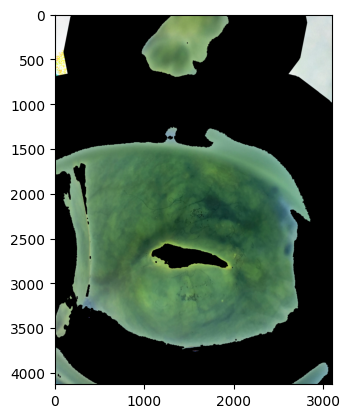

In [ ]:
Mascara_MG = watershed("/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/10.jpg")
plt.imshow(Mascara_MG)

Guardar

In [ ]:
def guardar(imagenbn, nombreArchivo):
  # Convertir la máscara a objeto de imagen
  mask_image = Image.fromarray(imagenbn)

  # Guardar la máscara
  ruta = '/content/drive/MyDrive/PROYECTO_GRADO/Watershed/' + nombreArchivo
  mask_image.save(ruta)

In [ ]:
ruta = "/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes"
lista_archivos = os.listdir(ruta)
len(lista_archivos)

1050

Prueba

In [ ]:
for i in range (len(lista_archivos)):
  Archivo = lista_archivos[i]
  #Ruta de imagen
  rutaImg = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + Archivo
  Mascara_watershed = watershed(rutaImg)
  guardar(Mascara_watershed, Archivo)

In [ ]:
print(2^10)

8


In [ ]:
import numpy as np

In [ ]:
a = np.array([1,2,3,4])
print(a[[False, True,False,False]])

[2]
